Recommender System requires advance knowledge on linear algebra

There are two types of recommender system 

   1.Content Based : Content based recommender system focuses on the attributes o the items and gives us recommendations based    
   on the similarities between them
   
   2.Collaborative Filtering : it produces recommendations based on the knowledge of user's attitude of items that is 
   it uses the "wisdom of crowd" to recommend items 
   
   In general CF is more commonly used than content based bcz it gives better results and relative easy to understand(from an overall implementation perspective)
   
   The algorithm has the ability to do feature learning on its own that means it can start to learn itself whT features should be used
   
   ***CF can be divided into***
   
   Memory based collaborative filtering 
   and 
   Model based collaborative filtering
   
In this notebook we will work on the Content based recommendation system on movie dataset   
   

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
column_names=['user_id','item_id','rating','timestamp']

In [7]:
column_names

['user_id', 'item_id', 'rating', 'timestamp']

In [9]:
input_file_path="D:/DataScience_Udemy/Py_DS_ML_Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/19-Recommender-Systems/u.data"

In [22]:
df=pd.read_csv(input_file_path,sep='\t',names=column_names)

***since our file 'u.data' is tab separated we are putting separater as '\t'***

In [24]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [26]:
 movie_titles=pd.read_csv("D:/DataScience_Udemy/Py_DS_ML_Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/19-Recommender-Systems/Movie_Id_Titles")

In [27]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


### Merging two dataframe

***Check Below :--->>>***

In [29]:
df=pd.merge(df,movie_titles,on='item_id')

In [30]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [33]:
sns.set_style('white')

In [35]:
df.groupby('title')['rating'].mean().sort_values(ascending=False)

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [36]:
df.groupby('title')['rating'].count().sort_values(ascending=False)

title
Star Wars (1977)                              584
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [39]:
type(df.groupby('title')['rating'].mean())

pandas.core.series.Series

###### since type of 'df.groupby('title')['rating'].mean()' is a series we will be creating a dataframe from this series

***Check Below :-->>>***

In [40]:
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())

In [41]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [42]:
ratings['no of rating']=df.groupby('title')['rating'].count()

In [43]:
ratings.head()

,rating,no of rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [46]:
print(ratings['no of rating'].max())
print(ratings['no of rating'].min())

584
1


<AxesSubplot:>

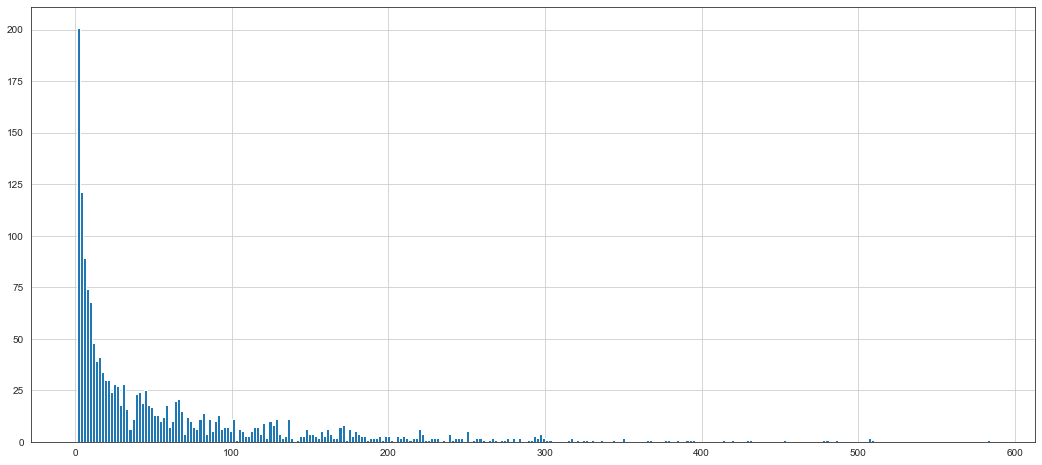

In [52]:
plt.figure(figsize=(18,8))
ratings['no of rating'].hist(bins=300)

In [59]:
ratings[ratings['no of rating']==584].count()

rating          1
no of rating    1
dtype: int64

In [62]:
ratings[ratings['no of rating']==300].count()

rating          1
no of rating    1
dtype: int64

<AxesSubplot:>

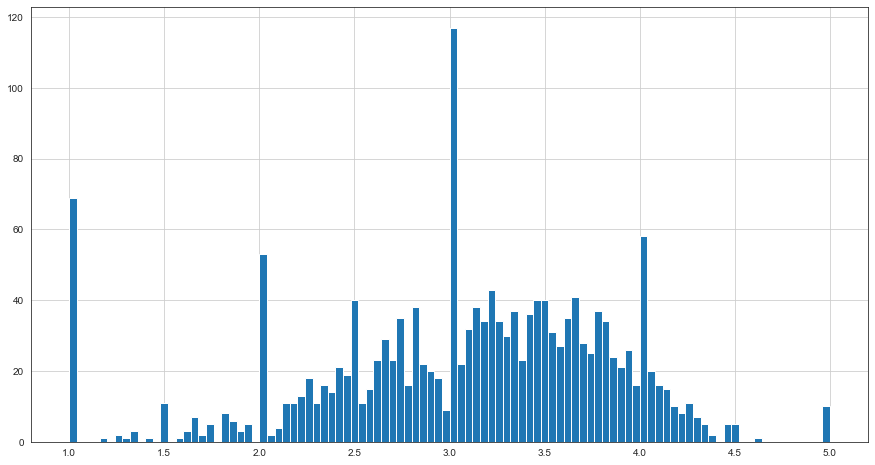

In [67]:
plt.figure(figsize=(15,8))
ratings['rating'].hist(bins=100)

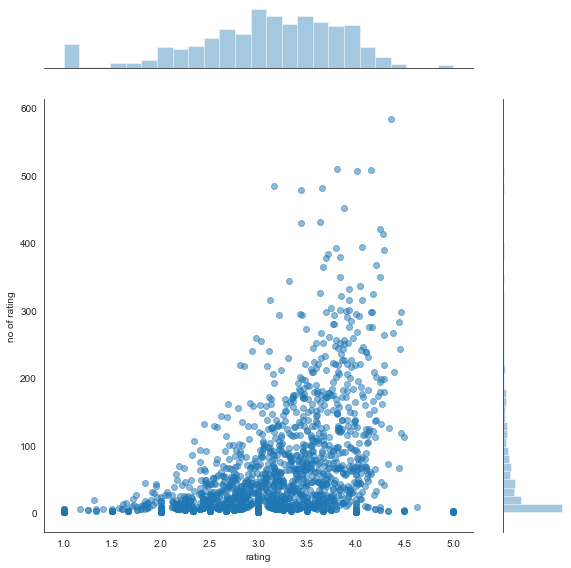

In [81]:
sns.jointplot(x='rating',y='no of rating',data=ratings,alpha=0.5,cmap='plasma',height=8,space=0.5)

In [82]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [85]:
moviemat=df.pivot_table(index='user_id',columns='title',values='rating')

In [87]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
ratings.sort_values('no of rating',ascending=False).head()

,rating,no of rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [93]:
starwar_user_rating=moviemat['Star Wars (1977)']
liar_liar_user_rating=moviemat['Liar Liar (1997)']

In [94]:
print(starwar_user_rating)
print('\n')
print(liar_liar_user_rating)

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64


user_id
0      NaN
1      NaN
2      1.0
3      2.0
4      5.0
      ... 
939    NaN
940    4.0
941    4.0
942    NaN
943    NaN
Name: Liar Liar (1997), Length: 944, dtype: float64


***use of function 'corrwith' to get correlation***

***here we are correlating two dfs moviemat and starwar_user_rating to get correlation*** 

***Check Below--->>>***

In [95]:
similar_to_starwars=moviemat.corrwith(starwar_user_rating)

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [97]:
type(similar_to_starwars)

pandas.core.series.Series

In [98]:
similar_to_starwars.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [99]:
similar_to_liarliar=moviemat.corrwith(liar_liar_user_rating)

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [100]:
similar_to_liarliar.head()

title
'Til There Was You (1997)    0.118913
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.469765
12 Angry Men (1957)          0.066272
187 (1997)                   0.175145
dtype: float64

In [101]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['correlation'])

In [116]:
corr_liarliar=pd.DataFrame(similar_to_liarliar,columns=['correlation'])

In [103]:
corr_starwars.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [106]:
corr_starwars.sort_values('correlation',ascending=False).head(10)

,correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [108]:
corr_starwars=corr_starwars.join(ratings['no of rating'])

In [113]:
corr_starwars[corr_starwars['no of rating']>100].sort_values('correlation',ascending=False).head(10)

,correlation,no of rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [117]:
corr_liarliar.head()

,correlation
title,
'Til There Was You (1997),0.118913
1-900 (1994),NaN
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145


In [118]:
corr_liarliar=corr_liarliar.join(ratings['no of rating'])

In [119]:
corr_liarliar.head()

,correlation,no of rating
title,,
'Til There Was You (1997),0.118913,9
1-900 (1994),NaN,5
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41


In [122]:
corr_liarliar[corr_liarliar['no of rating']>100].sort_values('correlation',ascending=False).head()

,correlation,no of rating
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
